In [ ]:
#import python libraries, tensorflow and keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#load dataset for image classification from keras
fashion_mnist = keras.datasets.fashion_mnist

#Split this data into training and test set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#create class names for the images. There are 10 different image classfications
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Now lets try and use vgg16 algorithm and see if it predicts better
#Step 1 - Create training and test images of size and shape required by VGG16. (1,224,224,3). Our current training and test images are (28,28)
import cv2

train_size = 6000
test_size = 1000

train_images = train_images[0:train_size]
train_labels = train_labels[0:train_size]
test_images = test_images[0:test_size]
test_labels = test_labels[0:test_size]

train_images = np.dstack([train_images] * 3)
train_images = train_images.reshape(-1, 28,28,3)

test_images = np.dstack([test_images] * 3)
test_images = test_images.reshape(-1, 28,28,3)

from keras.preprocessing.image import img_to_array, array_to_img
train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in test_images])

#Lets scale the images
#train_images = train_images / 255.
#test_images = test_images / 255.
#train_images = train_images.astype('float32')
#test_images = test_images.astype('float32')

print('train_images : ', train_images.shape)
print('test_images : ', test_images.shape)



4431872/4422102 [==============================] - 0s 0us/step
train_images :  (6000, 224, 224, 3)
test_images :  (1000, 224, 224, 3)


In [ ]:
#Now lets try and use vgg16 algorithm and see if it predicts better
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.utils.vis_utils import plot_model

vgg16_base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3))

inputs = keras.Input(shape=[224, 224, 3])
x = preprocess_input(inputs)
x = vgg16_base_model(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
model_with_vgg16_bottom = keras.Model(inputs, outputs)

vgg16_base_model.trainable = False

model_with_vgg16_bottom.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model_with_vgg16_bottom.summary()
#plot_model(model_with_vgg16_bottom)

history = model_with_vgg16_bottom.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels))

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/10
188/188 [==============================] - 49s 187ms/step - loss: 5.0612 - accuracy: 0.7703 - val_loss: 5.1203 - val_accuracy: 0.8100
Epoch 2/10
188/188 [==============================] - 33s 175ms/step - loss: 1.9645 - accuracy: 0.8985 - val_loss: 5.0893 - val_accuracy: 0.8280
Epoch 3/10
188/188 [==============================] - 33s 174ms/step - loss: 1.2609 - accuracy: 0.9245 - val_loss: 5.5629 - val_accuracy: 0.8180
Epoch 4/10
188/188 [==============================] - 33s 176ms/step - loss: 0.7158 - accuracy: 0.9493 - val_loss: 4.7864 - val_accuracy: 0.8360
Epoch 5/10
188/188 [==============================] - 33s 178ms/step - loss: 0.5443 - accuracy: 0.9637 - val_loss: 4.7286 - val_accuracy: 0.8570
Epoch 6/10
188/188 [==============================] - 33s 177ms/step - loss: 0.5976 - accuracy: 0.9623 - val_loss: 4.7217 - val_accuracy: 0.8590
Epoch 7/10
188/188 [==============================] - 34s 179ms/s

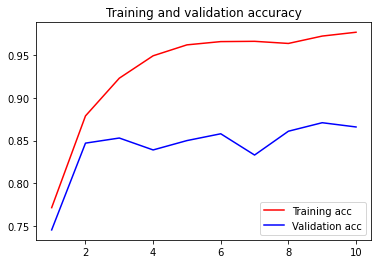

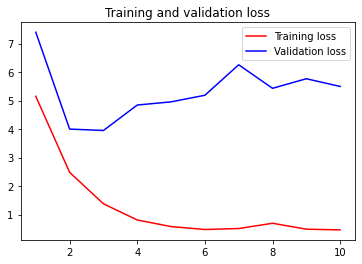

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

test_loss, test_acc = model_with_vgg16_bottom.evaluate(test_images, test_labels, verbose=0)

y_pred = model_with_vgg16_bottom.predict(test_images,verbose=1)
y_pred_value = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)
print('Precision Score: ', precision_score(y_pred_value, test_labels , average="macro"))
print('Recall Score: ', recall_score(y_pred_value, test_labels , average="macro"))
print('F1 Score: ', f1_score(y_pred_value, test_labels , average="macro"))
print('Confusion Matrix \n', confusion_matrix(y_pred_value, test_labels))

32/32 [==============================] - 5s 150ms/step
Test Loss:  6.774092674255371
Test Accuracy:  0.8510000109672546
Precision Score:  0.8524820681143188
Recall Score:  0.8633787342709537
F1 Score:  0.8549271593130932
Confusion Matrix 
 [[ 92   2   4  11   1   0  13   0   2   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   0  79   1   7   0   6   0   0   0]
 [  1   3   0  67   2   0   2   0   0   0]
 [  2   0  11   4  98   0  13   0   0   0]
 [  0   0   0   1   0  76   0   0   1   1]
 [ 12   0  17   9   7   0  63   0   0   0]
 [  0   0   0   0   0   8   0  94   1   3]
 [  0   0   0   0   0   1   0   0  91   0]
 [  0   0   0   0   0   2   0   1   0  91]]
